<a href="https://colab.research.google.com/github/mohmaed7777/Variable-Transformation-Feature-Engineering/blob/main/Variable_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn
%matplotlib inline
print('Setup compelted!')

Setup compelted!


In [18]:
df = pd.read_csv('/content/AmesHousing.csv')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,...,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,...,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [20]:
# Handling the missing values: 
missing_values = df.isnull().sum()
missing_values[:10]

Order              0
PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage     490
Lot Area           0
Street             0
Alley           2732
Lot Shape          0
Land Contour       0
dtype: int64

In [21]:
# The percentage value of the missing data: 
total_cells = np.product(df.shape)
total_missings = missing_values.sum()
percent = (total_missings / total_cells) * 100
print(int(percent))

5


In [22]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']
sns.set()

Populating the interactive namespace from numpy and matplotlib


In [23]:
# take a look of how our dataframe shape: 
df.shape

(2930, 82)

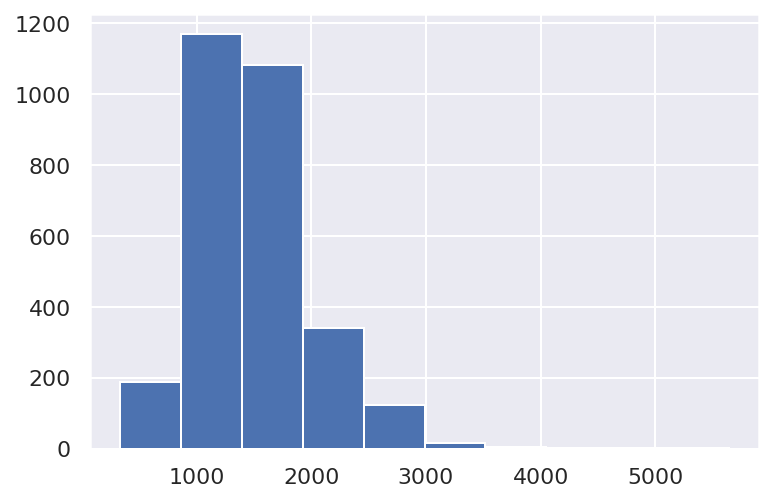

In [24]:
df['Gr Liv Area'].hist()

In [25]:
# This is recommanded by the dataset aurthor to remove a few outliers: 
df = df.loc[df['Gr Liv Area'] <= 4000, :]
print('Number of rows in the data:', df.shape[0])
print('Number of columns in the data:', df.shape[1])
data = df.copy()

Number of rows in the data: 2925
Number of columns in the data: 82


In [26]:
# Drop unnessary values: 
df.drop(['PID', 'Order'], axis=1, inplace=True)

In [27]:
df.head(1)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000


In [28]:
df.SalePrice.value_counts

<bound method IndexOpsMixin.value_counts of 0       215000
1       105000
2       172000
3       244000
4       189900
         ...  
2925    142500
2926    131000
2927    132000
2928    170000
2929    188000
Name: SalePrice, Length: 2925, dtype: int64>

In [29]:
df.describe()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2925.000000,2435.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2902.000000,2924.000000,2924.000000,2924.000000,2924.000000,2925.000000,2925.000000,2925.000000,2925.000000,2923.000000,2923.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2766.000000,2924.000000,2924.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000
mean,57.396581,69.023819,10103.583590,6.088205,5.563761,1971.302906,1984.234188,100.710544,438.097469,49.807456,558.947332,1046.852257,1155.461197,333.832821,4.684786,1493.978803,0.430380,0.060554,1.564786,0.378462,2.853675,1.044444,6.434188,0.596923,1978.088214,1.765048,471.883721,93.392137,47.166838,23.050940,2.596923,16.029402,1.893333,44.909744,6.216752,2007.791453,180411.574701
std,42.668752,22.710918,7781.999124,1.402953,1.112262,30.242474,20.861774,176.034290,438.032289,169.300590,439.621369,421.109533,376.592039,425.841983,46.349684,486.273646,0.524089,0.244223,0.551386,0.502403,0.827737,0.214251,1.557887,0.645349,25.528869,0.759834,213.816049,126.034142,66.571810,64.186809,25.162589,56.131397,32.964272,472.237990,2.711541,1.317408,78554.857286
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,58.000000,7438.000000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,218.750000,792.750000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,50.000000,68.000000,9428.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,369.500000,0.000000,464.500000,989.500000,1082.000000,0.000000,0.000000,1441.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,70.000000,80.000000,11515.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.250000,0.000000,801.000000,1299.250000,1383.000000,702.000000,0.000000,1740.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2288.000000,1526.000000,2336.000000,3206.000000,3820.000000,1862.000000,1064.000000,3820.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,14.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000,625000.000000


In [30]:
stats_df = df.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']
out_feilds = ['mean', '25%', '50%', '75%', 'range']
stats_df.loc[out_feilds]

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
mean,57.396581,69.023819,10103.58359,6.088205,5.563761,1971.302906,1984.234188,100.710544,438.097469,49.807456,558.947332,1046.852257,1155.461197,333.832821,4.684786,1493.978803,0.43038,0.060554,1.564786,0.378462,2.853675,1.044444,6.434188,0.596923,1978.088214,1.765048,471.883721,93.392137,47.166838,23.05094,2.596923,16.029402,1.893333,44.909744,6.216752,2007.791453,180411.574701
25%,20.000000,58.000000,7438.00000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,218.750000,792.750000,876.000000,0.000000,0.000000,1126.000000,0.00000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,50.000000,68.000000,9428.00000,6.000000,5.000000,1973.000000,1993.000000,0.000000,369.500000,0.000000,464.500000,989.500000,1082.000000,0.000000,0.000000,1441.000000,0.00000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.00000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,70.000000,80.000000,11515.00000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.250000,0.000000,801.000000,1299.250000,1383.000000,702.000000,0.000000,1740.000000,1.00000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
range,170.000000,292.000000,213945.00000,9.000000,8.000000,138.000000,60.000000,1600.000000,2288.000000,1526.000000,2336.000000,3206.000000,3486.000000,1862.000000,1064.000000,3486.000000,3.00000,2.000000,4.000000,2.000000,8.000000,3.000000,12.000000,4.000000,312.000000,5.000000,1488.000000,1424.000000,742.000000,1012.00000,508.000000,576.000000,800.000000,15500.000000,11.000000,4.000000,612211.000000


## **Log Transformation skew variables:**

In [33]:
df.select_dtypes('number')

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,5,2010,215000
1,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,105000
2,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,172000
3,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,1968.0,2.0,522.0,0,0,0,0,0,0,0,4,2010,244000
4,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,37.0,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,1003.0,1003,0,0,1003,1.0,0.0,1,0,3,1,6,0,1984.0,2.0,588.0,120,0,0,0,0,0,0,3,2006,142500
2926,20,NaN,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,864.0,902,0,0,902,1.0,0.0,1,0,2,1,5,0,1983.0,2.0,484.0,164,0,0,0,0,0,0,6,2006,131000
2927,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,NaN,0.0,0.0,80,32,0,0,0,0,700,7,2006,132000
2928,20,77.0,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,1389.0,1389,0,0,1389,1.0,0.0,1,0,2,1,6,1,1975.0,2.0,418.0,240,38,0,0,0,0,0,4,2006,170000


In [34]:
# create a list of float columns to check for skewing: 
num_cols = df.select_dtypes('number').columns
skew_limit = 0.75 # define a limmit above which we will log transform
skew_vals = df[num_cols].skew()
# showing the skewed colmns: 
skew_cols = skew_vals[abs(skew_vals) > skew_limit].sort_values(ascending=False)
skew_cols

Misc Val           22.225015
Pool Area          18.743766
Lot Area           13.200004
Low Qual Fin SF    12.107629
3Ssn Porch         11.393854
Kitchen AbvGr       4.309573
BsmtFin SF 2        4.135900
Enclosed Porch      4.010586
Bsmt Half Bath      3.965970
Screen Porch        3.953495
Mas Vnr Area        2.565458
Open Porch SF       2.495162
Wood Deck SF        1.848286
SalePrice           1.591072
MS SubClass         1.356549
Lot Frontage        1.111071
1st Flr SF          0.942615
Bsmt Unf SF         0.925021
Gr Liv Area         0.878879
2nd Flr SF          0.847517
BsmtFin SF 1        0.821985
dtype: float64

[Text(0, 0.5, 'Frequancy'),
 Text(0.5, 0, 'value'),
 Text(0.5, 1.0, 'after np.log1p')]

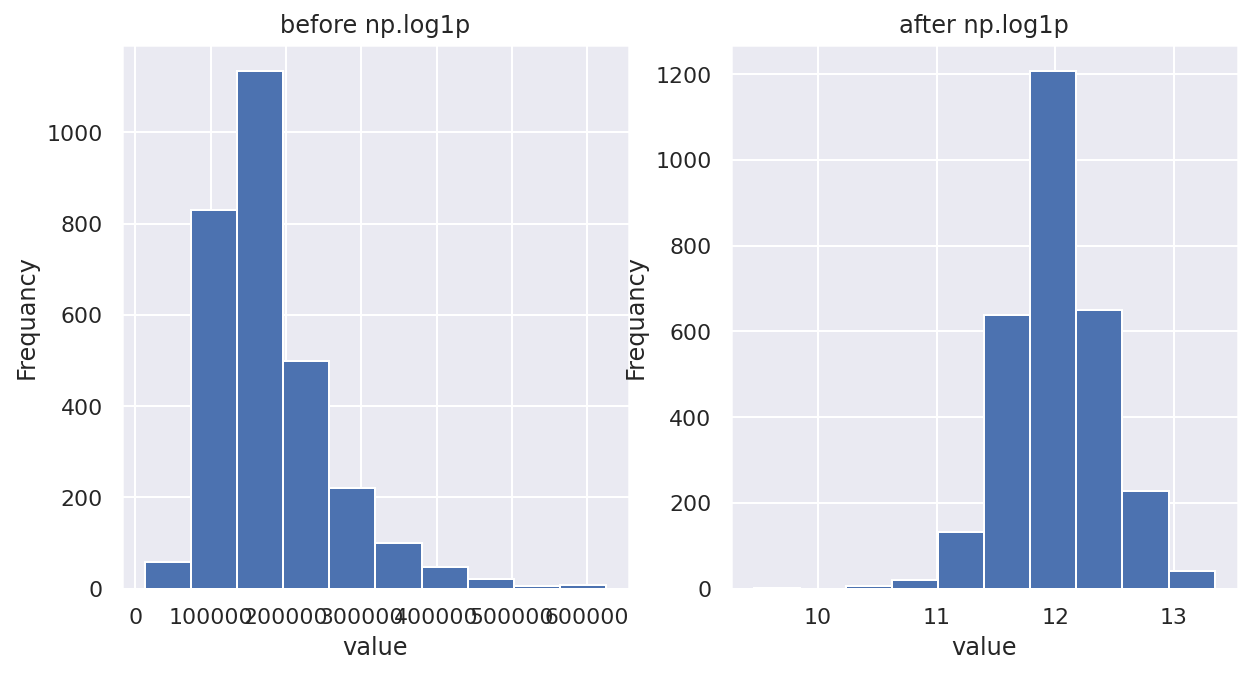

In [45]:
# let's look at what happens to one of these fetures , when we apply np.log1p visually: 
# choose the field : 
field = 'SalePrice'
# Create two subplots & figure using matplotlib 
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))
# create two subplots & figure using matplotlib: 
df[field].hist(ax=ax_before)
# Apply a log transformation (numpy axes) to this column
df[field].apply(np.log1p).hist(ax=ax_after)
# Formatting the titles: 
ax_before.set(title='before np.log1p',
              ylabel='Frequancy',
              xlabel='value')
ax_after.set(title='after np.log1p',
              ylabel='Frequancy',
              xlabel='value')


In [46]:
# perform the skew transformation: 
for col in skew_cols.index.values:
  if col == 'SalePrice':
    continue
  df[col] = df[col].apply(np.log1p)  